In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib as mpl
from textwrap import wrap
mpl.rcParams["font.family"] = "Times New Roman"
mpl.rcParams["font.sans-serif"] = "Times New Roman"
mpl.rcParams["font.size"] = 14
viridis_colors=['#440154', '#414487', '#2a788e', '#22a884', '#7ad151', '#fde725']

In [2]:
def wrap_text(text, num_chars=15):
    return '\n'.join(wrap(text, num_chars))

In [3]:
def wrap_ax_xlabels(ax, num_chars=15):
    ax.set_xticklabels(['\n'.join(wrap(label.get_text(), num_chars)) for label in ax.get_xticklabels()])

# Screening

In [4]:
def read_and_merged(merged_df, base_path, file_name, xlsx_name, columns_of_interest, aggregate_with = "mean"):
    file_path = base_path + file_name + '/' + xlsx_name + '.xlsx'
    datafile =  pd.read_excel(file_path)
    if aggregate_with=="mean":
        datafile = datafile.groupby("Replication Id")[columns_of_interest].mean().reset_index()
    elif aggregate_with=="sum":
        datafile = datafile.groupby("Replication Id")[columns_of_interest].sum().reset_index()
    merged_df = pd.merge(merged_df, datafile, on=['Replication Id'], how='right')
    return merged_df

In [5]:
merged_dfs = []
run_length = 28 #days
no_chambers = 3
periodic_duration = 2 #hours

# base_path = "Data/Experiments/Screening/"
regime = '40_80_10'
fleet_mix = 'Baseline'
base_path = "data/Experiments/StressTesting/" # "Data/Experiments/SensitivityAnalysis/FleetIntensity/"

for i, lock_condition in enumerate(['Ideal', 'Regular', 'Rapid']):
    folder_path = base_path + lock_condition
    input_file_path = folder_path + '/Scenario Parameters.xlsx'
    input_df =  pd.read_excel(input_file_path, index_col=0)
    no_set_per_file = len(input_df)
    input_df['FleetMix'] = fleet_mix
    input_df['LockingRegime'] = regime
    input_df['LockCondition'] = lock_condition

    kpi_file_path = folder_path + '/KPI Locks Summary.xlsx'
    kpi_df =  pd.read_excel(kpi_file_path, index_col=0)
    kpi_df['SetNo'] = 1 + (kpi_df.index -1) % no_set_per_file

    # Adding Emission calculation to kpi_df
    file_path = folder_path + '/KPI Emissions Locks.xlsx'
    datafile =  pd.read_excel(file_path)
    datafile = datafile[datafile["Emission substance"]== "CO2"].loc[:,["Replication Id", "Emissions slowsteaming (kg/day)"]]
    kpi_df = pd.merge(kpi_df, datafile, on=['Replication Id'], how='right')

    # Merging these two dataframes
    merged_df = pd.merge(input_df, kpi_df, on=['SetNo'], how='right')

    merged_dfs.append(merged_df)

experiments = pd.concat(merged_dfs)
# del(merged_dfs)
experiments.describe()

,SetNo,TrafficRange,FleetIntensity,FlutteringProbability,MTTR,SlowDownEffect,MeanSlowDownCounter,PeriodicInspection,InspectionStart,InspectionDuration,...,Avg Occupancy (%),Max number of ships waiting,Avg passage time (minutes),Avg waiting time (minutes),Service Level (%),Total Waiting Time (hours),Total Leveling Time (hours),Avg ships per leveling,Avg ships per filled leveling,Emissions slowsteaming (kg/day)
count,450.000000,450.0,450.000000,450.000000,450.0,450.000000,450.000000,450.0,450.0,450.0,...,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,8.000000,1.5,24.000000,0.015000,2.0,0.166667,1306.666667,28.0,8.0,2.0,...,43.588320,31.393333,47.669458,27.782721,65.107698,4037.429384,2829.827627,2.651221,2.830726,37826.011536
std,4.325302,0.0,12.975907,0.012261,0.0,0.136234,699.220055,0.0,0.0,0.0,...,3.868868,11.307543,6.991710,6.500491,9.186239,1346.943152,350.685968,0.262574,0.252906,9500.474644
min,1.000000,1.5,3.000000,0.000000,2.0,0.000000,560.000000,28.0,8.0,2.0,...,37.053955,14.000000,36.909350,18.146709,43.578947,2142.521433,2211.597887,2.209048,2.402782,23877.963167
25%,4.000000,1.5,12.000000,0.000000,2.0,0.000000,560.000000,28.0,8.0,2.0,...,40.229987,22.000000,41.686793,22.180485,57.527324,2881.240831,2532.527105,2.422338,2.610194,29712.750406
50%,8.000000,1.5,24.000000,0.015000,2.0,0.166667,1120.000000,28.0,8.0,2.0,...,43.395606,29.000000,46.448281,26.350364,65.758974,3758.308440,2822.241027,2.642547,2.817305,36164.194337
75%,12.000000,1.5,36.000000,0.030000,2.0,0.333333,2240.000000,28.0,8.0,2.0,...,46.694165,38.000000,52.717476,32.481592,73.319030,5036.440726,3106.874226,2.869797,3.034970,44839.609269
max,15.000000,1.5,45.000000,0.030000,2.0,0.333333,2240.000000,28.0,8.0,2.0,...,52.185616,86.000000,70.860139,48.795457,81.408809,8112.244717,3668.253337,3.244958,3.391704,65769.328704


In [6]:
experiments.columns

Index(['SetNo', 'TrafficRange', 'FleetIntensity', 'FlutteringProbability',
       'MTTR', 'SlowDownEffect', 'MeanSlowDownCounter', 'PeriodicInspection',
       'InspectionStart', 'InspectionDuration', 'FleetMix', 'LockingRegime',
       'LockCondition', 'Replication Id', 'Lock', 'Amount of ships',
       'Amount of levelings', 'Amount of empty levelings (%)',
       'Avg Occupancy (%)', 'Max number of ships waiting',
       'Avg passage time (minutes)', 'Avg waiting time (minutes)',
       'Service Level (%)', 'Total Waiting Time (hours)',
       'Total Leveling Time (hours)', 'Avg ships per leveling',
       'Avg ships per filled leveling', 'Emissions slowsteaming (kg/day)'],
      dtype='object')

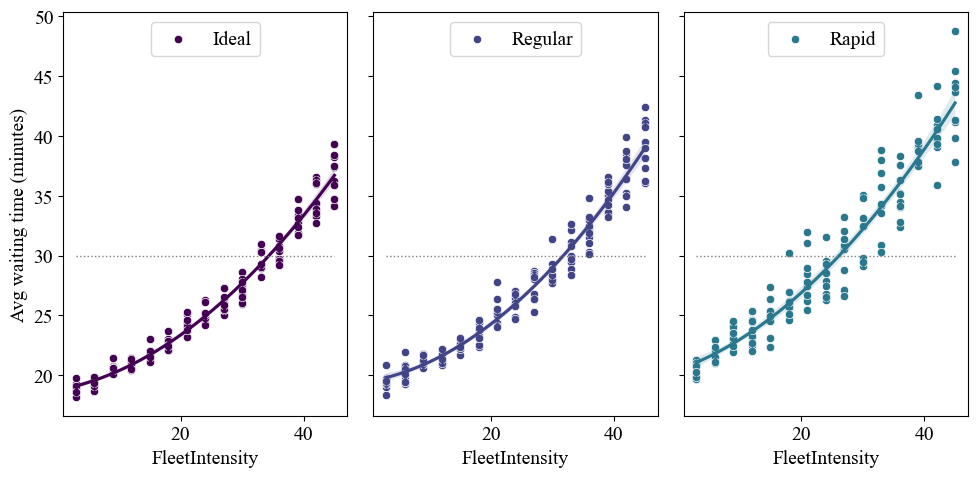

In [7]:
y_col = 'Avg waiting time (minutes)'
fig, ax = plt.subplots(1,3, figsize=(10, 5), sharey=True)
for i, lock_condition in enumerate(['Ideal', 'Regular', 'Rapid']):
    sns.scatterplot(ax=ax[i], data=experiments[experiments['LockCondition']==lock_condition], 
    x='FleetIntensity', y=y_col, color=viridis_colors[i], label=lock_condition)
    
    sns.regplot(ax=ax[i], data=experiments[experiments['LockCondition']==lock_condition], x='FleetIntensity', y=y_col, color=viridis_colors[i],
                scatter_kws={'s': 1}, order=2)
    ax[i].hlines(y=30, xmin=3, xmax=45, linewidth=1, color='gray', ls=':')
    ax[i].legend(loc='upper center')

plt.tight_layout()
plt.savefig('output/figs/output_analysis/stress_testing/' + y_col + '.pdf')
plt.show()


In [8]:
pd.pivot_table(experiments, values='Avg waiting time (minutes)', index='FleetIntensity', columns='LockCondition', aggfunc='mean')

LockCondition,Ideal,Rapid,Regular
FleetIntensity,,,
3,18.868478,20.526851,19.464272
6,19.387480,21.628206,20.256272
9,20.612500,23.452163,21.258043
12,20.903910,23.617203,21.511304
15,21.697426,24.822029,22.477627
18,22.584670,26.206491,23.481538
21,24.157923,28.175813,25.341890
24,25.079922,28.316797,26.033737
27,25.929665,30.277588,27.489097


In [9]:
pd.pivot_table(experiments, values='Avg waiting time (minutes)', index='FleetIntensity', columns='LockCondition', 
               aggfunc=lambda x: np.percentile(x, 0))

LockCondition,Ideal,Rapid,Regular
FleetIntensity,,,
3,18.146709,19.707257,18.334356
6,18.699060,20.986620,19.261846
9,20.128638,21.907416,20.593309
12,20.416940,22.005730,20.880625
15,21.070755,22.351039,21.687151
18,22.109301,24.635030,22.343708
21,23.211583,25.486967,24.043385
24,24.227362,26.246825,24.731024
27,25.052233,26.632685,25.284036


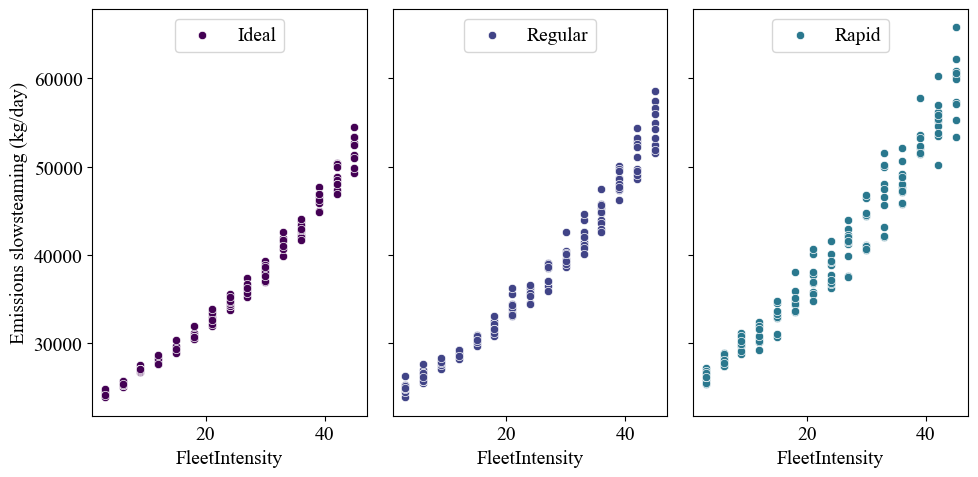

In [10]:
y_col = 'Emissions slowsteaming (kg/day)'
fig, ax = plt.subplots(1,3, figsize=(10, 5), sharey=True)
for i, lock_condition in enumerate(['Ideal', 'Regular', 'Rapid']):
    sns.scatterplot(ax=ax[i], data=experiments[experiments['LockCondition']==lock_condition], 
    x='FleetIntensity', y=y_col, color=viridis_colors[i], label=lock_condition)
    ax[i].legend(loc='upper center')

plt.tight_layout()
plt.savefig('output/figs/output_analysis/stress_testing/' + y_col.replace('/', '') + '.pdf')
plt.show()


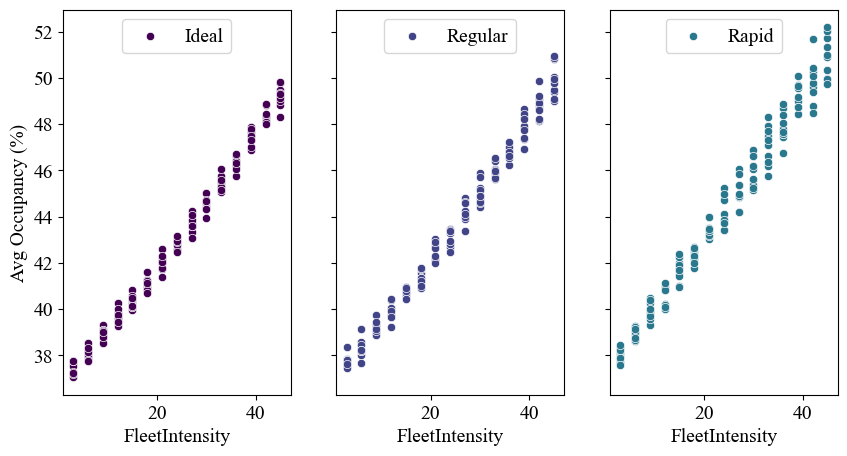

In [11]:
y_col = 'Avg Occupancy (%)'
fig, ax = plt.subplots(1,3, figsize=(10, 5), sharey=True)
for i, lock_condition in enumerate(['Ideal', 'Regular', 'Rapid']):
    sns.scatterplot(ax=ax[i], data=experiments[experiments['LockCondition']==lock_condition], 
    x='FleetIntensity', y=y_col, color=viridis_colors[i], label=lock_condition)
    ax[i].legend(loc='upper center')